In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import math
import pickle

In [2]:
dataset = pd.read_csv("FedCycleData.csv")
dataset.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


In [3]:
dataset.tail()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
1660,nfp8334,7,1,1,0,29,,19,10,13,...,,,,,,,,,,
1661,nfp8334,8,1,1,0,28,,17,11,12,...,,,,,,,,,,
1662,nfp8334,9,1,1,0,28,,16,12,11,...,,,,,,,,,,
1663,nfp8334,10,1,1,1,40,,27,13,13,...,,,,,,,,,,
1664,nfp8334,11,1,1,2,24,,,,,...,,,,,,,,,,


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [5]:
dataset

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,7,1,1,0,29,,19,10,13,...,,,,,,,,,,
1661,nfp8334,8,1,1,0,28,,17,11,12,...,,,,,,,,,,
1662,nfp8334,9,1,1,0,28,,16,12,11,...,,,,,,,,,,
1663,nfp8334,10,1,1,1,40,,27,13,13,...,,,,,,,,,,


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [7]:
dataset.describe()

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,8.040841,0.382583,0.912312,0.055255,29.299099
std,6.593686,0.486164,0.282925,0.479706,3.887932
min,1.000000,0.000000,0.000000,0.000000,18.000000
25%,3.000000,0.000000,1.000000,0.000000,27.000000
50%,7.000000,0.000000,1.000000,0.000000,29.000000
75%,11.000000,1.000000,1.000000,0.000000,31.000000
max,45.000000,1.000000,1.000000,9.000000,54.000000


In [8]:
print(dataset.shape)

(1665, 80)


In [9]:
dataset.isnull().any()

ClientID                False
CycleNumber             False
Group                   False
CycleWithPeakorNot      False
ReproductiveCategory    False
                        ...  
NextpregM               False
Spousesame              False
SpousesameM             False
Timeattemptpreg         False
BMI                     False
Length: 80, dtype: bool

In [10]:
dataset.isnull()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1661,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1662,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1663,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
dataset = dataset.replace(' ', np.nan)
nan_cols = []
for col in dataset.columns:
    x = pd.isna(dataset[col])
    x = x.to_numpy()
    if not False in x:
        nan_cols.append(col)
print(nan_cols)

[]


In [12]:
dataset

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,NaN,NaN,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,NaN,15,12,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nfp8122,3,0,1,0,29,NaN,15,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nfp8122,4,0,1,0,27,NaN,15,12,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nfp8122,5,0,1,0,28,NaN,16,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,7,1,1,0,29,NaN,19,10,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,nfp8334,8,1,1,0,28,NaN,17,11,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,nfp8334,9,1,1,0,28,NaN,16,12,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663,nfp8334,10,1,1,1,40,NaN,27,13,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataset.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,NaN,NaN,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,NaN,15,12,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nfp8122,3,0,1,0,29,NaN,15,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nfp8122,4,0,1,0,27,NaN,15,12,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nfp8122,5,0,1,0,28,NaN,16,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dataset.tail()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
1660,nfp8334,7,1,1,0,29,NaN,19,10,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,nfp8334,8,1,1,0,28,NaN,17,11,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,nfp8334,9,1,1,0,28,NaN,16,12,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663,nfp8334,10,1,1,1,40,NaN,27,13,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1664,nfp8334,11,1,1,2,24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataset.isnull().any()

ClientID                False
CycleNumber             False
Group                   False
CycleWithPeakorNot      False
ReproductiveCategory    False
                        ...  
NextpregM                True
Spousesame               True
SpousesameM              True
Timeattemptpreg          True
BMI                      True
Length: 80, dtype: bool

In [16]:
dataset.isnull()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1661,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1662,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1663,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [17]:
dataset.drop(['MeanCycleLength', 'Method', 'Method', 'Prevmethod', 'Methoddate', 'Whychart', 'Nextpreg', 'NextpregM', 
              'Spousesame', 'SpousesameM', 'Timeattemptpreg', 'BMI', 'Medvitexplain', 'Gynosurgeries', 'LivingkidsM', 
              'Boys', 'Girls', 'MedvitsM', 'Urosurgeries', 'Breastfeeding', 'OccupationM', ], axis = 1, inplace = True)

In [18]:
dataset

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,...,IncomeM,Height,Weight,Reprocate,Numberpreg,Livingkids,Miscarriages,Abortions,Medvits,MedvitexplainM
0,nfp8122,1,0,1,0,29,17,12,12,5,...,5,63,120,0,3,3,0,0,0,NaN
1,nfp8122,2,0,1,0,27,15,12,13,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nfp8122,3,0,1,0,29,15,14,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nfp8122,4,0,1,0,27,15,12,13,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nfp8122,5,0,1,0,28,16,12,12,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,7,1,1,0,29,19,10,13,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,nfp8334,8,1,1,0,28,17,11,12,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,nfp8334,9,1,1,0,28,16,12,11,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663,nfp8334,10,1,1,1,40,27,13,13,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dataset.drop(['Medvits', 'IncomeM', 'Height', 'Weight', 'Reprocate', 'Numberpreg', 'Livingkids','Miscarriages', 'Abortions', 
              'MedvitexplainM', 'Maristatus', 'MaristatusM', 'Maristatus', 'Yearsmarried', 'Wedding', 'Religion', 'ReligionM', 
              'Ethnicity', 'Schoolyears', 'SchoolyearsM', 'EthnicityM'], axis = 1, inplace = True)

In [20]:
dataset

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,...,MensesScoreDay15,TotalMensesScore,MeanBleedingIntensity,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding,PhasesBleeding,IntercourseDuringUnusBleed,Age,AgeM
0,nfp8122,1,0,1,0,29,17,12,12,5,...,NaN,10,9.04,5,1,0,NaN,NaN,36,39
1,nfp8122,2,0,1,0,27,15,12,13,2,...,NaN,10,NaN,6,1,0,NaN,NaN,NaN,NaN
2,nfp8122,3,0,1,0,29,15,14,NaN,1,...,NaN,10,NaN,5,1,0,NaN,NaN,NaN,NaN
3,nfp8122,4,0,1,0,27,15,12,13,2,...,NaN,12,NaN,3,0,0,NaN,NaN,NaN,NaN
4,nfp8122,5,0,1,0,28,16,12,12,4,...,NaN,11,NaN,5,1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,7,1,1,0,29,19,10,13,5,...,NaN,15,NaN,8,0,1,NaN,NaN,NaN,NaN
1661,nfp8334,8,1,1,0,28,17,11,12,3,...,NaN,11,NaN,11,1,0,NaN,NaN,NaN,NaN
1662,nfp8334,9,1,1,0,28,16,12,11,4,...,NaN,9,NaN,7,0,0,NaN,NaN,NaN,NaN
1663,nfp8334,10,1,1,1,40,27,13,13,13,...,NaN,12,NaN,3,0,0,NaN,NaN,NaN,NaN


In [21]:
dataset.dtypes['ClientID']

dtype('O')

In [22]:
dataset.drop(['MensesScoreDay15', 'MeanBleedingIntensity', 'PhasesBleeding', 'IntercourseDuringUnusBleed', 'Age',  'AgeM', 
              'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11', 'MensesScoreDay12', 'MensesScoreDay13', 
              'MensesScoreDay14',  'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight', 'MeanMensesLength', 
              'ClientID'], axis = 1, inplace = True)

In [23]:
dataset

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,17,12,12,5,0,...,5,3,3,2,1,1,10,5,1,0
1,2,0,1,0,27,15,12,13,2,0,...,5,3,3,2,1,1,10,6,1,0
2,3,0,1,0,29,15,14,NaN,1,0,...,5,3,3,2,1,1,10,5,1,0
3,4,0,1,0,27,15,12,13,2,0,...,5,3,3,3,2,1,12,3,0,0
4,5,0,1,0,28,16,12,12,4,0,...,5,3,3,2,2,1,11,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,19,10,13,5,0,...,8,2,3,3,2,2,15,8,0,1
1661,8,1,1,0,28,17,11,12,3,0,...,6,3,3,2,1,1,11,11,1,0
1662,9,1,1,0,28,16,12,11,4,0,...,5,3,2,2,1,1,9,7,0,0
1663,10,1,1,1,40,27,13,13,13,0,...,6,2,3,3,2,1,12,3,0,0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CycleNumber                 1665 non-null   int64 
 1   Group                       1665 non-null   int64 
 2   CycleWithPeakorNot          1665 non-null   int64 
 3   ReproductiveCategory        1665 non-null   int64 
 4   LengthofCycle               1665 non-null   int64 
 5   EstimatedDayofOvulation     1515 non-null   object
 6   LengthofLutealPhase         1514 non-null   object
 7   FirstDayofHigh              1407 non-null   object
 8   TotalNumberofHighDays       1653 non-null   object
 9   TotalHighPostPeak           1662 non-null   object
 10  TotalNumberofPeakDays       1649 non-null   object
 11  TotalDaysofFertility        1634 non-null   object
 12  TotalFertilityFormula       1663 non-null   object
 13  LengthofMenses              1661 non-null   obje

In [25]:
for column in dataset:
    print(column)

CycleNumber
Group
CycleWithPeakorNot
ReproductiveCategory
LengthofCycle
EstimatedDayofOvulation
LengthofLutealPhase
FirstDayofHigh
TotalNumberofHighDays
TotalHighPostPeak
TotalNumberofPeakDays
TotalDaysofFertility
TotalFertilityFormula
LengthofMenses
MensesScoreDayOne
MensesScoreDayTwo
MensesScoreDayThree
MensesScoreDayFour
MensesScoreDayFive
TotalMensesScore
NumberofDaysofIntercourse
IntercourseInFertileWindow
UnusualBleeding


In [26]:
 for column in dataset:
        print(dataset[column].dtypes)

int64
int64
int64
int64
int64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object


In [27]:
for column in dataset:
    if dataset[column].dtypes == 'O':
        print('It is object')
    else:
        print("It is not")

It is not
It is not
It is not
It is not
It is not
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object
It is object


In [28]:
dataset

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,17,12,12,5,0,...,5,3,3,2,1,1,10,5,1,0
1,2,0,1,0,27,15,12,13,2,0,...,5,3,3,2,1,1,10,6,1,0
2,3,0,1,0,29,15,14,NaN,1,0,...,5,3,3,2,1,1,10,5,1,0
3,4,0,1,0,27,15,12,13,2,0,...,5,3,3,3,2,1,12,3,0,0
4,5,0,1,0,28,16,12,12,4,0,...,5,3,3,2,2,1,11,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,19,10,13,5,0,...,8,2,3,3,2,2,15,8,0,1
1661,8,1,1,0,28,17,11,12,3,0,...,6,3,3,2,1,1,11,11,1,0
1662,9,1,1,0,28,16,12,11,4,0,...,5,3,2,2,1,1,9,7,0,0
1663,10,1,1,1,40,27,13,13,13,0,...,6,2,3,3,2,1,12,3,0,0


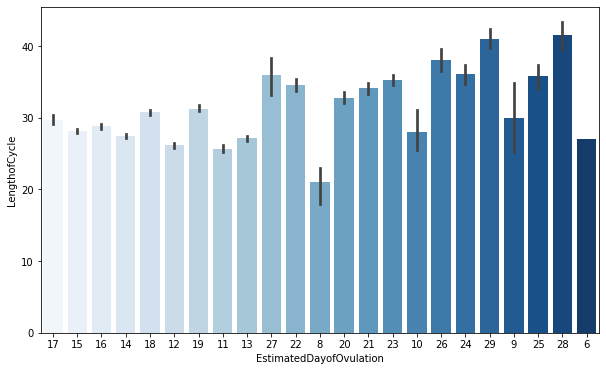

In [29]:
sns.barplot(x="EstimatedDayofOvulation", y="LengthofCycle", data=dataset, palette = "Blues")
plt.show()

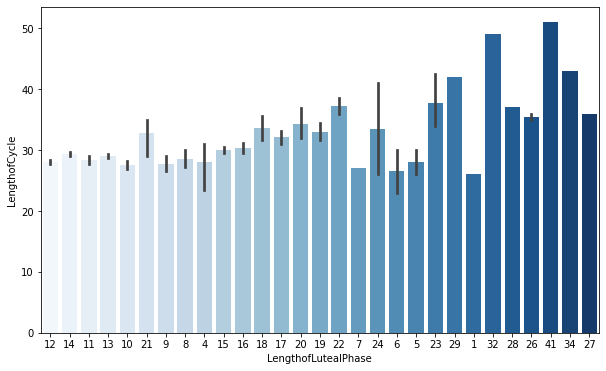

In [30]:
sns.barplot(x="LengthofLutealPhase", y="LengthofCycle", data=dataset, palette = "Blues")
plt.show()

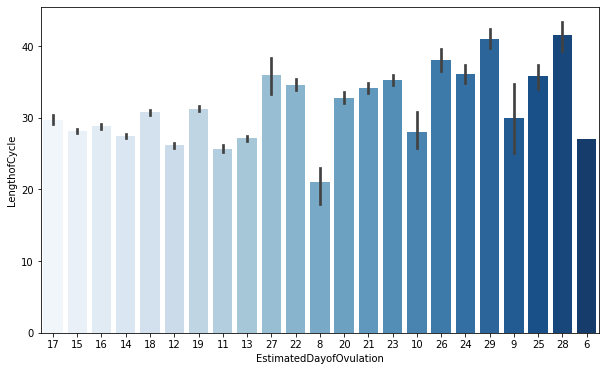

In [31]:
sns.barplot(x="EstimatedDayofOvulation", y="LengthofCycle", data=dataset, palette = "Blues")
plt.show()

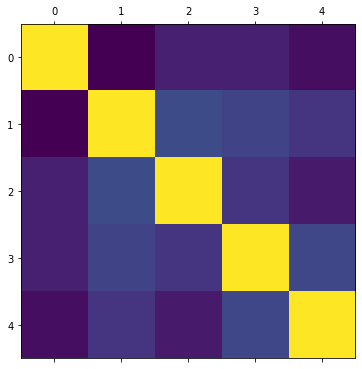

In [32]:
plt.matshow(dataset.corr())
plt.show()

<AxesSubplot:>

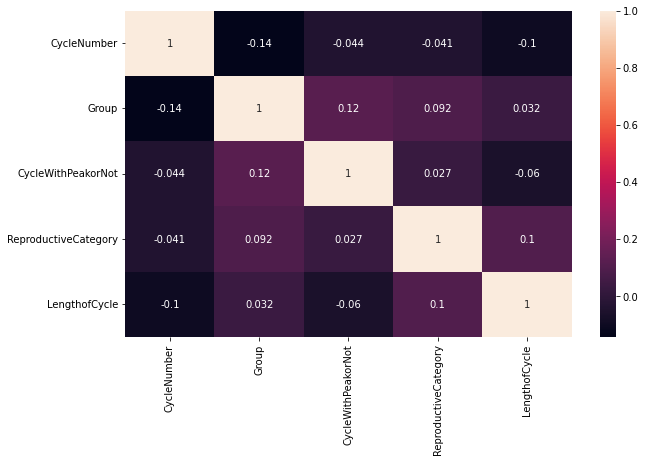

In [33]:
dataplot = sns.heatmap(dataset.corr(), annot=True)
dataplot

In [34]:
dataset.head()

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,17,12,12,5,0,...,5,3,3,2,1,1,10,5,1,0
1,2,0,1,0,27,15,12,13,2,0,...,5,3,3,2,1,1,10,6,1,0
2,3,0,1,0,29,15,14,NaN,1,0,...,5,3,3,2,1,1,10,5,1,0
3,4,0,1,0,27,15,12,13,2,0,...,5,3,3,3,2,1,12,3,0,0
4,5,0,1,0,28,16,12,12,4,0,...,5,3,3,2,2,1,11,5,1,0


In [35]:
dataset = dataset.fillna(0)

In [36]:
dataset

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,17,12,12,5,0,...,5,3,3,2,1,1,10,5,1,0
1,2,0,1,0,27,15,12,13,2,0,...,5,3,3,2,1,1,10,6,1,0
2,3,0,1,0,29,15,14,0,1,0,...,5,3,3,2,1,1,10,5,1,0
3,4,0,1,0,27,15,12,13,2,0,...,5,3,3,3,2,1,12,3,0,0
4,5,0,1,0,28,16,12,12,4,0,...,5,3,3,2,2,1,11,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,19,10,13,5,0,...,8,2,3,3,2,2,15,8,0,1
1661,8,1,1,0,28,17,11,12,3,0,...,6,3,3,2,1,1,11,11,1,0
1662,9,1,1,0,28,16,12,11,4,0,...,5,3,2,2,1,1,9,7,0,0
1663,10,1,1,1,40,27,13,13,13,0,...,6,2,3,3,2,1,12,3,0,0


In [37]:
for column in dataset:
    if dataset[column].dtypes == 'O':
               dataset[column].astype('O').astype(int)

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CycleNumber                 1665 non-null   int64 
 1   Group                       1665 non-null   int64 
 2   CycleWithPeakorNot          1665 non-null   int64 
 3   ReproductiveCategory        1665 non-null   int64 
 4   LengthofCycle               1665 non-null   int64 
 5   EstimatedDayofOvulation     1665 non-null   object
 6   LengthofLutealPhase         1665 non-null   object
 7   FirstDayofHigh              1665 non-null   object
 8   TotalNumberofHighDays       1665 non-null   object
 9   TotalHighPostPeak           1665 non-null   object
 10  TotalNumberofPeakDays       1665 non-null   object
 11  TotalDaysofFertility        1665 non-null   object
 12  TotalFertilityFormula       1665 non-null   object
 13  LengthofMenses              1665 non-null   obje

In [39]:
x1 = dataset.iloc[ : , 0:4]
x2 = dataset.iloc[ : , 6:24]

features = x1.join(x2)
target = dataset.iloc[ : , 4:5]

# sanity check
assert features.shape[0] == target.shape[0]

In [40]:
features

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,TotalNumberofPeakDays,TotalDaysofFertility,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,12,12,5,0,2,9,...,5,3,3,2,1,1,10,5,1,0
1,2,0,1,0,12,13,2,0,2,6,...,5,3,3,2,1,1,10,6,1,0
2,3,0,1,0,14,0,1,0,2,5,...,5,3,3,2,1,1,10,5,1,0
3,4,0,1,0,12,13,2,0,2,6,...,5,3,3,3,2,1,12,3,0,0
4,5,0,1,0,12,12,4,0,2,8,...,5,3,3,2,2,1,11,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,10,13,5,0,3,10,...,8,2,3,3,2,2,15,8,0,1
1661,8,1,1,0,11,12,3,0,4,9,...,6,3,3,2,1,1,11,11,1,0
1662,9,1,1,0,12,11,4,0,3,9,...,5,3,2,2,1,1,9,7,0,0
1663,10,1,1,1,13,13,13,0,1,0,...,6,2,3,3,2,1,12,3,0,0


In [41]:
target

,LengthofCycle
0,29
1,27
2,29
3,27
4,28
...,...
1660,29
1661,28
1662,28
1663,40


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
print("Feature dimension: ",features.shape)
print("Target dimension: ",target.shape)

Feature dimension:  (1665, 21)
Target dimension:  (1665, 1)


In [44]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2,random_state=42)

In [45]:
print("x_train dimension: ",x_train.shape)
print("y_train dimension: ",y_train.shape)

x_train dimension:  (1332, 21)
y_train dimension:  (1332, 1)


In [46]:
print("x_test dimension: ",x_test.shape)
print("y_test dimension: ",y_test.shape)

x_test dimension:  (333, 21)
y_test dimension:  (333, 1)


In [47]:
assert x_train.shape[0] == y_train.shape[0]

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [49]:
print(model.score(x_test, y_test))

0.5812094062764919


In [50]:
y_test

,LengthofCycle
940,31
986,23
405,25
721,26
1610,23
...,...
231,30
643,28
1418,29
715,30


In [51]:
x = features
y = target
x

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,TotalNumberofPeakDays,TotalDaysofFertility,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,12,12,5,0,2,9,...,5,3,3,2,1,1,10,5,1,0
1,2,0,1,0,12,13,2,0,2,6,...,5,3,3,2,1,1,10,6,1,0
2,3,0,1,0,14,0,1,0,2,5,...,5,3,3,2,1,1,10,5,1,0
3,4,0,1,0,12,13,2,0,2,6,...,5,3,3,3,2,1,12,3,0,0
4,5,0,1,0,12,12,4,0,2,8,...,5,3,3,2,2,1,11,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,10,13,5,0,3,10,...,8,2,3,3,2,2,15,8,0,1
1661,8,1,1,0,11,12,3,0,4,9,...,6,3,3,2,1,1,11,11,1,0
1662,9,1,1,0,12,11,4,0,3,9,...,5,3,2,2,1,1,9,7,0,0
1663,10,1,1,1,13,13,13,0,1,0,...,6,2,3,3,2,1,12,3,0,0


In [52]:
y

,LengthofCycle
0,29
1,27
2,29
3,27
4,28
...,...
1660,29
1661,28
1662,28
1663,40


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CycleNumber                 1665 non-null   int64 
 1   Group                       1665 non-null   int64 
 2   CycleWithPeakorNot          1665 non-null   int64 
 3   ReproductiveCategory        1665 non-null   int64 
 4   LengthofCycle               1665 non-null   int64 
 5   EstimatedDayofOvulation     1665 non-null   object
 6   LengthofLutealPhase         1665 non-null   object
 7   FirstDayofHigh              1665 non-null   object
 8   TotalNumberofHighDays       1665 non-null   object
 9   TotalHighPostPeak           1665 non-null   object
 10  TotalNumberofPeakDays       1665 non-null   object
 11  TotalDaysofFertility        1665 non-null   object
 12  TotalFertilityFormula       1665 non-null   object
 13  LengthofMenses              1665 non-null   obje

In [54]:
dataset["EstimatedDayofOvulation"] = dataset["EstimatedDayofOvulation"].astype('O').astype(int)

In [55]:
dataset["LengthofLutealPhase"] = dataset["LengthofLutealPhase"].astype('O').astype(int)

In [56]:
dataset["FirstDayofHigh"] = dataset["FirstDayofHigh"].astype('O').astype(int)

In [57]:
dataset["TotalNumberofHighDays"] = dataset["TotalNumberofHighDays"].astype('O').astype(int)

In [58]:
dataset["TotalHighPostPeak"] = dataset["TotalHighPostPeak"].astype('O').astype(int)

In [59]:
dataset["TotalFertilityFormula"] = dataset["TotalHighPostPeak"].astype(str).astype(int)

In [60]:
dataset["TotalHighPostPeak"] = dataset["TotalHighPostPeak"].astype(str).astype(int)

In [61]:
dataset["TotalNumberofPeakDays"] = dataset["TotalNumberofPeakDays"].astype('O').astype(int)

In [62]:
dataset["TotalDaysofFertility"] = dataset["TotalDaysofFertility"].astype('O').astype(int)

In [63]:
dataset["LengthofMenses"] = dataset["LengthofMenses"].astype('O').astype(int)

In [64]:
dataset["MensesScoreDayOne"] = dataset["MensesScoreDayOne"].astype('O').astype(int)

In [65]:
dataset["MensesScoreDayTwo"] = dataset["MensesScoreDayTwo"].astype('O').astype(int)

In [66]:
dataset["MensesScoreDayThree"] = dataset["MensesScoreDayThree"].astype('O').astype(int)

In [67]:
dataset["MensesScoreDayFour"] = dataset["MensesScoreDayFour"].astype('O').astype(int)

In [68]:
dataset["MensesScoreDayFive"] = dataset["MensesScoreDayFive"].astype('O').astype(int)

In [69]:
dataset["TotalMensesScore"] = dataset["TotalMensesScore"].astype('O').astype(int)

In [70]:
dataset["NumberofDaysofIntercourse"] = dataset["NumberofDaysofIntercourse"].astype('O').astype(int)

In [71]:
dataset["IntercourseInFertileWindow"] = dataset["IntercourseInFertileWindow"].astype('O').astype(int)

In [72]:
dataset["UnusualBleeding"] = dataset["UnusualBleeding"].astype('O').astype(int)

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CycleNumber                 1665 non-null   int64
 1   Group                       1665 non-null   int64
 2   CycleWithPeakorNot          1665 non-null   int64
 3   ReproductiveCategory        1665 non-null   int64
 4   LengthofCycle               1665 non-null   int64
 5   EstimatedDayofOvulation     1665 non-null   int32
 6   LengthofLutealPhase         1665 non-null   int32
 7   FirstDayofHigh              1665 non-null   int32
 8   TotalNumberofHighDays       1665 non-null   int32
 9   TotalHighPostPeak           1665 non-null   int32
 10  TotalNumberofPeakDays       1665 non-null   int32
 11  TotalDaysofFertility        1665 non-null   int32
 12  TotalFertilityFormula       1665 non-null   int32
 13  LengthofMenses              1665 non-null   int32
 14  MensesSc

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(chi2, k = 5)
fit = best_features.fit(x, y) # Run score function on (X, y) and get the appropriate features.
fit

SelectKBest(k=5, score_func=<function chi2 at 0x1E6D3FA0>)

In [75]:
# for bool, feature in zip(fit, dataset.columns):
#      if bool:
#         selected_features.append(feature)
# print("The best features are:{}".format(selected_features)) # The list of your 5 best features

In [76]:
# Storing features and there score value in dataframes:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(features.columns)
# Concat two dataframes for better visualization
features_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
features_scores.columns = ["Features", "Scores"] # naming the dataframe Coloumns
# saving dataframe to csv
name = "feature_scores"
features_scores.to_csv(name)
features_scores.head()

,Features,Scores
0,CycleNumber,259.489791
1,Group,22.231205
2,CycleWithPeakorNot,6.479763
3,ReproductiveCategory,397.318626
4,LengthofLutealPhase,297.809570


In [77]:
# Drop the unwanted features i.e. only keep top k features:
# This method if you want to store your features in array:
select_kbest = best_features.fit_transform(features, target)
# How to create csv/dataframe with only selected features:
index_kbest = best_features.get_support() # provides the index for kbest features
selected_features = features.loc[:,index_kbest].columns.tolist()
print(selected_features)

['CycleNumber', 'ReproductiveCategory', 'LengthofLutealPhase', 'FirstDayofHigh', 'TotalFertilityFormula']


In [78]:
iterr = list(features.columns)

for column in  iterr:
 
    if column not in selected_features:
        x.drop([column], axis = 1 , inplace = True)
    

In [79]:
x

,CycleNumber,ReproductiveCategory,LengthofLutealPhase,FirstDayofHigh,TotalFertilityFormula
0,1,0,12,12,15
1,2,0,12,13,13
2,3,0,14,0,13
3,4,0,12,13,13
4,5,0,12,12,14
...,...,...,...,...,...
1660,7,0,10,13,15
1661,8,0,11,12,13
1662,9,0,12,11,12
1663,10,1,13,13,24


In [80]:
y

,LengthofCycle
0,29
1,27
2,29
3,27
4,28
...,...
1660,29
1661,28
1662,28
1663,40


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [82]:
from sklearn.linear_model import LinearRegression
  
regr = LinearRegression()
  
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

In [83]:
predictions

array([[26.9491262 ],
       [29.748918  ],
       [26.72568433],
       [30.61439341],
       [30.52195219],
       [28.38092347],
       [27.62838164],
       [27.85727329],
       [30.59605525],
       [27.73469631],
       [27.09712443],
       [23.27573415],
       [26.23013353],
       [31.08355304],
       [32.42971767],
       [31.2609882 ],
       [29.36496019],
       [27.07215221],
       [34.93180478],
       [30.71947015],
       [30.40777419],
       [27.58184754],
       [29.7117957 ],
       [30.23812097],
       [32.08276433],
       [29.13901469],
       [31.20550953],
       [31.04336677],
       [31.04757862],
       [27.79151252],
       [35.53875643],
       [30.85143767],
       [30.74358624],
       [29.22187264],
       [29.00729697],
       [28.91271977],
       [29.09292962],
       [32.66540619],
       [30.82995719],
       [29.40539932],
       [31.05169085],
       [31.67851338],
       [26.20490845],
       [33.12589233],
       [30.75049442],
       [32

In [84]:
print(regr.score(x_test, y_test))

0.6261576172617975


In [85]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error ->', metrics.mean_absolute_error(y_test, predictions))
# Print out the mean squared error (mse)
print('Mean Squared Error ->', metrics.mean_squared_error(y_test, predictions))
# Print out the mean absolute error (rmse)
print('Root Mean Squared Error ->', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error -> 1.5372127248948342
Mean Squared Error -> 4.200669900254634
Root Mean Squared Error -> 2.049553585602151


In [86]:
print('Accuracy is ',regr.score(x_test, y_test)*100,'%')

Accuracy is  62.615761726179755 %


### Save The Model

In [87]:
# file = open('regression.pkl', 'wb')
# pickle.dump(regr, file)

In [88]:
model_name = "regr.pkl"
pickle.dump(regr, open(model_name,'wb'))

In [89]:
model = pickle.load(open('regr.pkl', 'rb'))
# track = pickle(model)

In [90]:
model

LinearRegression()

In [91]:
y_prediction = model.predict(x_test)

In [92]:
y_prediction

array([[26.9491262 ],
       [29.748918  ],
       [26.72568433],
       [30.61439341],
       [30.52195219],
       [28.38092347],
       [27.62838164],
       [27.85727329],
       [30.59605525],
       [27.73469631],
       [27.09712443],
       [23.27573415],
       [26.23013353],
       [31.08355304],
       [32.42971767],
       [31.2609882 ],
       [29.36496019],
       [27.07215221],
       [34.93180478],
       [30.71947015],
       [30.40777419],
       [27.58184754],
       [29.7117957 ],
       [30.23812097],
       [32.08276433],
       [29.13901469],
       [31.20550953],
       [31.04336677],
       [31.04757862],
       [27.79151252],
       [35.53875643],
       [30.85143767],
       [30.74358624],
       [29.22187264],
       [29.00729697],
       [28.91271977],
       [29.09292962],
       [32.66540619],
       [30.82995719],
       [29.40539932],
       [31.05169085],
       [31.67851338],
       [26.20490845],
       [33.12589233],
       [30.75049442],
       [32

In [93]:
metrics.r2_score(y_test, y_prediction)

0.6261576172617975